In [78]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import ast
import os

## Carregamento de arquivos

In [79]:
pasta_base = 'C:/Users/nicolly.lira/Desktop/tcc/arquivos_tratados'
arquivo = os.path.join(pasta_base, 'submission_palavras_contadas.csv')
df_submissions = pd.read_csv(arquivo, sep = ',', encoding = 'utf-8')

In [80]:
df_submissions['full_text'] = df_submissions['full_text'].apply(ast.literal_eval)
df_submissions.head()

,coments,created,id,selftext,title,up,full_text,qtd_term
0,58.0,1.594245e+09,t3_hnqcmv,Tava mexendo no meu computador antigo e achei ...,Ela percebeu,2208.0,"[ela, percebeu, tava, mexendo, no, meu, comput...",4
1,352.0,1.671150e+09,t3_zn0wi8,Normalmente eu almoço na empresa mas hoje me d...,Me namorado fez uma coisa que me deixou toda b...,1944.0,"[me, namorado, fez, uma, coisa, que, me, deixo...",2
2,118.0,1.610661e+09,t3_kxfnzb,"Olá, meu nome é Gabriel, tenho 18 anos e moro ...",Hoje é o dia mais sombrio da minha cidade.,1850.0,"[hoje, e, o, dia, mais, sombrio, da, minha, ci...",10
3,349.0,1.631280e+09,t3_plkxny,"Hoje eu me caso com o homem da minha vida, e n...","Hoje eu me caso, e ninguém da minha família va...",1779.0,"[hoje, eu, me, caso, , e, ninguem, da, minha, ...",2
4,327.0,1.601058e+09,t3_izowvi,"Olá brasileiros, vou tentar por em palavras oq...",Minha mãe provavelmente vai morrer nas próxima...,1624.0,"[minha, mae, provavelmente, vai, morrer, nas, ...",11


## Separação dos grupos: muitos termos do léxico x controle

<Axes: >

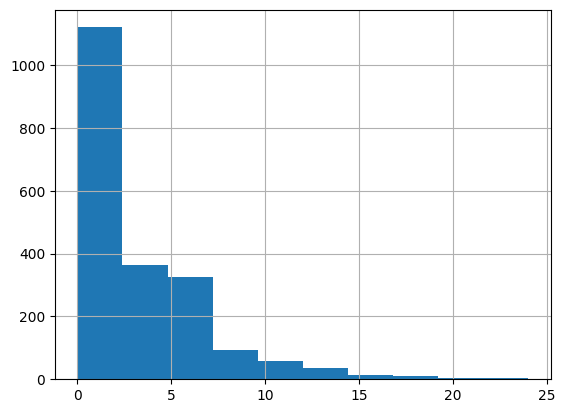

In [82]:
df_submissions['qtd_term'].hist()

In [83]:
df_depressed = df_submissions[df_submissions['qtd_term'] > 5]
df_depressed.reset_index(drop=True, inplace = True)
df_control = df_submissions[df_submissions['qtd_term'] <= 5]
df_control.reset_index(drop=True, inplace = True)

In [84]:
df_depressed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   coments    391 non-null    float64
 1   created    391 non-null    float64
 2   id         391 non-null    object 
 3   selftext   391 non-null    object 
 4   title      391 non-null    object 
 5   up         391 non-null    float64
 6   full_text  391 non-null    object 
 7   qtd_term   391 non-null    int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 24.6+ KB


In [85]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   coments    1637 non-null   float64
 1   created    1637 non-null   float64
 2   id         1637 non-null   object 
 3   selftext   1634 non-null   object 
 4   title      1637 non-null   object 
 5   up         1637 non-null   float64
 6   full_text  1637 non-null   object 
 7   qtd_term   1637 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 102.4+ KB


## Word cloud

In [135]:
def get_key_value_by_value(dictionary, search_value):
    dict_by_values = {}
    for key, value in dictionary.items():
        if value == search_value:
            dict_by_values[key] = value
    return dict_by_values
    # Return None if the value is not found in the dictionary
    return None, None

# Search for a value and get the corresponding key-value pair
search_value = 1
dict_by_values = get_key_value_by_value(word_frequency_dict, search_value)

low_frequency_words = list(dict_by_values.keys())


In [136]:
#nltk.download('stopwords')
stop_words_nltk = list(stopwords.words('portuguese'))
stop_words_nltk.extend(low_frequency_words)
stop_words_nltk.extend(['pra', 'nao', 'ate', 'ja', 'etc', 'porem', 'ta', 'estao', 'pro', 'alguma', 'vao', 'pq',
                        'oq', 'n', 'q', 'voce', 'apos', 'ne', 'muita', 'mim', 'dela', 'literalmente', 'gabriel'])
clean_words = [word for text in df_depressed['full_text'] for word in text if word not in stop_words_nltk]
clean_text = ' '.join(clean_words)
word_frequency_dict = wordcloud.process_text(text = clean_text)
#.generate_from_frequencies(clean_text)

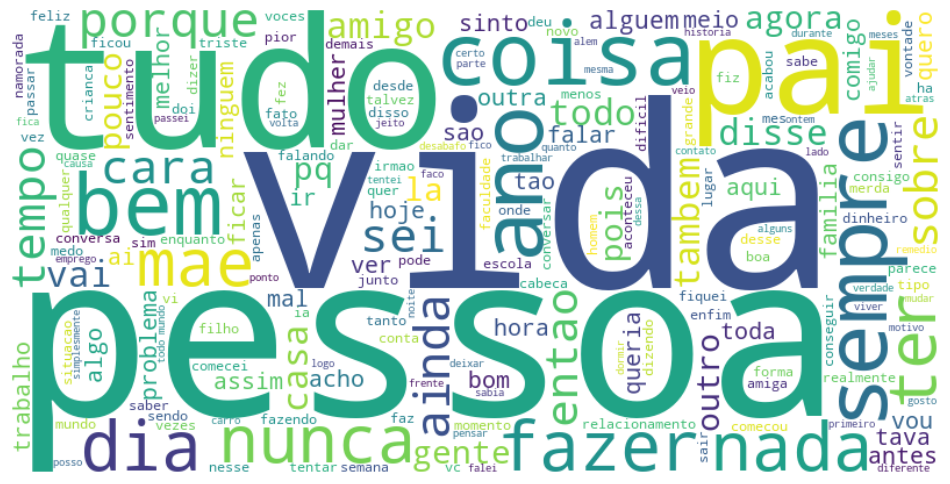

In [137]:
wordcloud = WordCloud(width=800, height=400, background_color='white', random_state = 2).generate(clean_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
spacy_object = spacy.load('pt_core_news_sm')
doc = spacy_object(clean_words)

clean_text = [token.text for token in doc if not token.is_stop]
clean_text = ' '.join(clean_text)

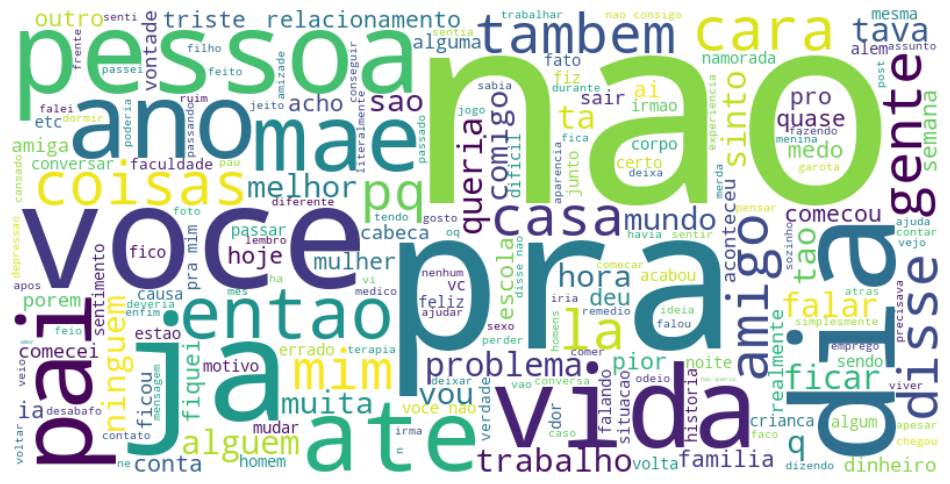

In [47]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
'pra', 'nao', 'ate', 'ja', 'etc', 'porem', 'ta', 'estao', 'pro', 'alguma', 'vao', 'oq', 'n', 'q', 'voce', 'apos', 'ne', 'muita', 'mim', 'dela', 'literalmente'

In [39]:
stop_words = spacy_object.Defaults.stop_words

In [138]:
'faz' in stop_words

True